## DECISION TREE MODEL

In [1]:
import pandas as pd 

df=pd.read_csv('drug200 - drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
df.shape

(200, 6)

In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe(include='O').T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,drugY,91


In [7]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

le_sex=LabelEncoder()
df['Sex']=le_sex.fit_transform(df['Sex'])

In [9]:
df['Sex'].value_counts()

Sex
1    104
0     96
Name: count, dtype: int64

In [10]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [11]:
df['BP']=df['BP'].map({'NORMAL':0,'LOW':1,'HIGH':2})

In [12]:
df['BP'].value_counts()

BP
2    77
1    64
0    59
Name: count, dtype: int64

In [13]:
df.describe(include='O')

,Cholesterol,Drug
count,200,200
unique,2,5
top,HIGH,drugY
freq,103,91


In [14]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [15]:
df['Cholesterol']=df['Cholesterol'].map({'NORMAL':0,'HIGH':1})

In [16]:
df['Cholesterol'].value_counts()

Cholesterol
1    103
0     97
Name: count, dtype: int64

In [17]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [18]:
le_drug=LabelEncoder()
df['Drug']=le_drug.fit_transform(df['Drug'])

In [19]:
df['Drug'].value_counts()

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

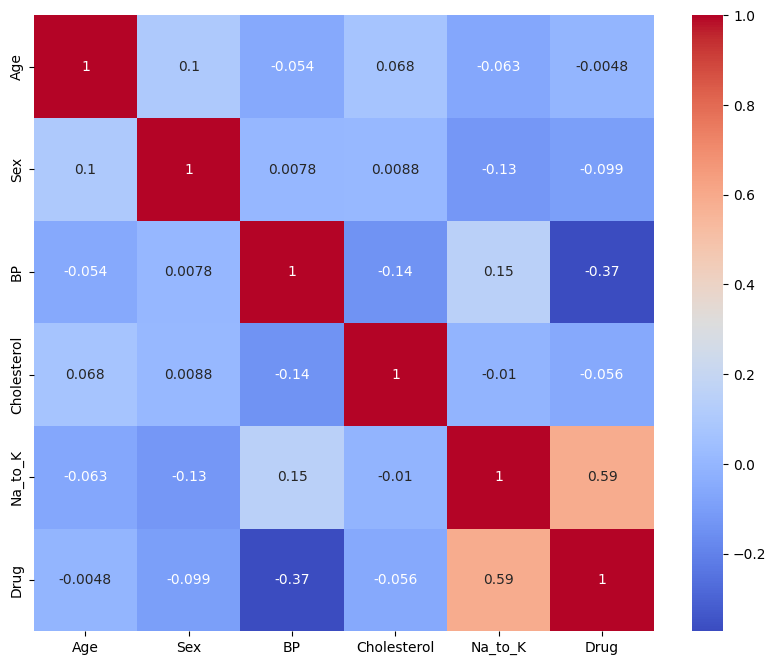

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [21]:
X=df.drop('Drug',axis=1)
y=df['Drug']

In [22]:
print(X.shape)
print(y.shape)

(200, 5)
(200,)


In [23]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(y_resampled.value_counts())

Drug
4    91
2    91
3    91
0    91
1    91
Name: count, dtype: int64


In [24]:
print(X_resampled.shape)
print(y_resampled.shape)

(455, 5)
(455,)


In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=49)

In [26]:
print(x_train.shape)
print(y_train.shape)

(364, 5)
(364,)


In [27]:
print(x_test.shape)
print(y_test.shape)

(91, 5)
(91,)


In [28]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=2)

In [29]:
dt.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred=dt.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [32]:
print("ACCURACY:",accuracy_score(y_test,y_pred))
print("PRECISION:",precision_score(y_test,y_pred,average='weighted'))
print("RECALL:",recall_score(y_test,y_pred,average='weighted'))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_pred))

ACCURACY: 0.945054945054945
PRECISION: 0.9565018315018314
RECALL: 0.945054945054945
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        15
           2       0.79      1.00      0.88        19
           3       1.00      0.74      0.85        19
           4       1.00      1.00      1.00        18

    accuracy                           0.95        91
   macro avg       0.96      0.95      0.95        91
weighted avg       0.96      0.95      0.94        91



In [33]:
import pickle

with open("dtmodel.pkl",'wb') as f:
    pickle.dump(dt,f)

In [34]:
print(le_drug.classes_)

['drugA' 'drugB' 'drugC' 'drugX' 'drugY']
